https://colab.research.google.com/drive/1_mKh4FytAezvKhnMBc5KVyb_0YJvjc5n?authuser=0#scrollTo=ykyUH_UThNf2

In [2]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
file_id = "1w_4xTCDYcY-lu3p1zB3pT2EjM7CuXIaa"
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url)

In [4]:

# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Print the number of missing values for each column
print("Number of missing values for each column:")
print(missing_values)


Number of missing values for each column:
id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


In [5]:
# Prepare X and y
X = df.drop(columns=['stroke','id'])  # Features (predictors)
y = df['stroke']  # Target variable
X.shape

(43400, 10)

In [6]:
X['Residence_type'] = X['Residence_type'].map({'Rural': 0, 'Urban': 1})
X['ever_married'] = X['ever_married'].map({'No': 0, 'Yes': 1})

In [7]:
# Count the number of rows where gender is "Other" and stroke is 1
count_other_stroke_1 = X[(X['gender'] == "Other") & (y == 1)].shape[0]

print("Count of rows where gender is 'Other' and stroke is 1:", count_other_stroke_1)

# Get indices where gender is "Other"
indices_to_remove = X[X['gender'] == 'Other'].index

# Remove these indices from both X and y
X = X.drop(indices_to_remove)
y = y.drop(indices_to_remove)

print(f'After removing gender=="Other" rows: X shape = {X.shape}, y shape = {y.shape}')

Count of rows where gender is 'Other' and stroke is 1: 0
After removing gender=="Other" rows: X shape = (43389, 10), y shape = (43389,)


In [8]:
X['gender'] = X['gender'].map({'Female': 0, 'Male': 1})

# ignore smoking values of missing type

In [9]:
X = pd.get_dummies(X, columns=['smoking_status', 'work_type'])

In [10]:

# Count the number of missing values in each column
missing_values = X.isnull().sum()

# Print the number of missing values for each column
print("Number of missing values for each column:")
print(missing_values)


Number of missing values for each column:
gender                               0
age                                  0
hypertension                         0
heart_disease                        0
ever_married                         0
Residence_type                       0
avg_glucose_level                    0
bmi                               1458
smoking_status_formerly smoked       0
smoking_status_never smoked          0
smoking_status_smokes                0
work_type_Govt_job                   0
work_type_Never_worked               0
work_type_Private                    0
work_type_Self-employed              0
work_type_children                   0
dtype: int64


split first then apply imputing and z-score normalization then undesampling

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


# Assuming X is your feature DataFrame and y is your target Series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34711, 16)
X_test shape: (8678, 16)
y_train shape: (34711,)
y_test shape: (8678,)


C:\Users\pouri\AppData\Local\Temp\ipykernel_16860\448175855.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts_train.index, y=class_counts_train.values, palette="Blues", ax=axes[0])
C:\Users\pouri\AppData\Local\Temp\ipykernel_16860\448175855.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts_test.index, y=class_counts_test.values, palette="Blues", ax=axes[1])


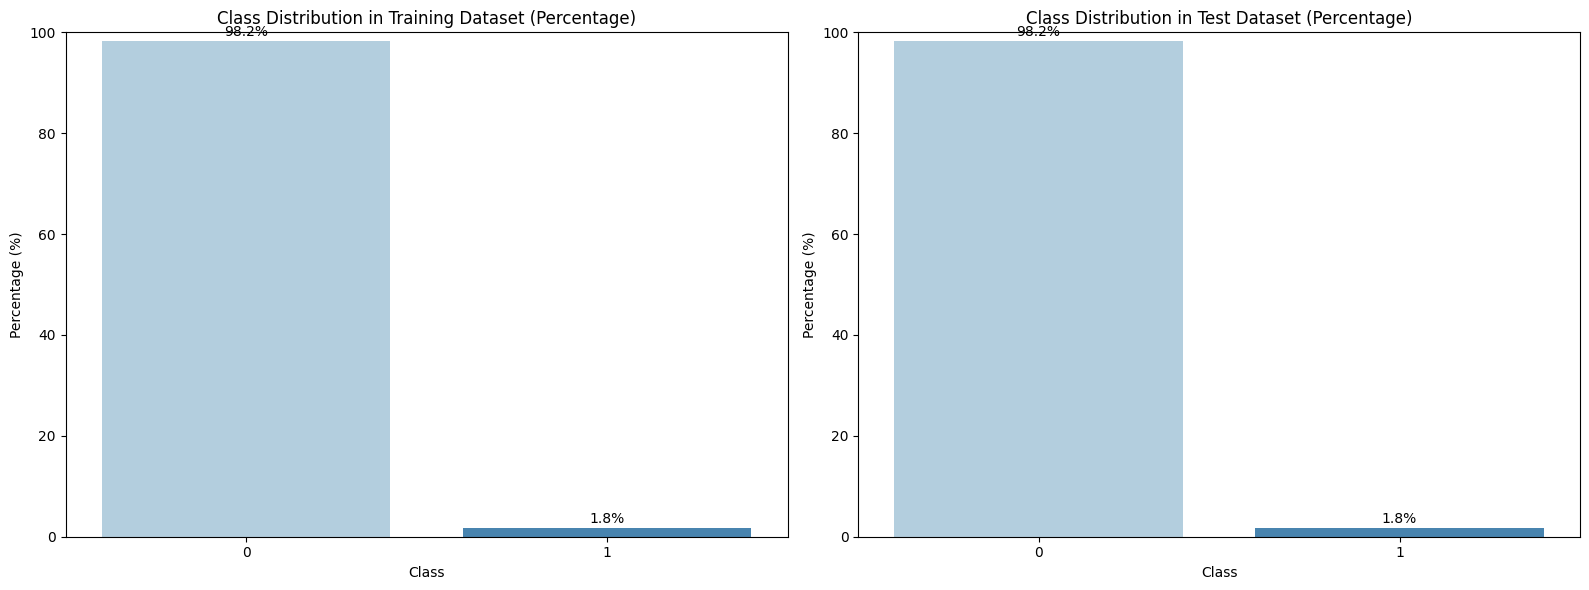

In [12]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of each class in y_train and y_test
class_counts_train = y_train.value_counts(normalize=True) * 100
class_counts_test = y_test.value_counts(normalize=True) * 100

# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for y_train
sns.barplot(x=class_counts_train.index, y=class_counts_train.values, palette="Blues", ax=axes[0])
axes[0].set_title("Class Distribution in Training Dataset (Percentage)")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Percentage (%)")
for i, percentage in enumerate(class_counts_train):
    axes[0].text(i, percentage + 1, f'{percentage:.1f}%', ha='center')
axes[0].set_ylim(0, 100)  # Set y-axis limit to 100%

# Plot for y_test
sns.barplot(x=class_counts_test.index, y=class_counts_test.values, palette="Blues", ax=axes[1])
axes[1].set_title("Class Distribution in Test Dataset (Percentage)")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Percentage (%)")
for i, percentage in enumerate(class_counts_test):
    axes[1].text(i, percentage + 1, f'{percentage:.1f}%', ha='center')
axes[1].set_ylim(0, 100)  # Set y-axis limit to 100%

# Display the plots
plt.tight_layout()
plt.show()

# imputing

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Define the columns for imputation and normalization
columns_to_impute = ['bmi']
columns_to_normalize = ['bmi', 'age', 'avg_glucose_level']

# Step 1: Impute missing values only for specified columns in X_train
imputer = SimpleImputer(strategy="median")  # Use median strategy
X_train[columns_to_impute] = imputer.fit_transform(X_train[columns_to_impute])  # Fit and transform on X_train
X_test[columns_to_impute] = imputer.transform(X_test[columns_to_impute])  # Transform only (do not fit) on X_test

# z-score normalization

In [14]:
# Apply the same imputer to X_test for the specified columns
X_test[columns_to_impute] = imputer.transform(X_test[columns_to_impute])  # Transform only (do not fit) on X_test

# Step 2: Normalize (z-score) only for specified columns in X_train
scaler = StandardScaler()
X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])  # Fit and transform on X_train

# Apply the same scaler to X_test for the specified columns
X_test[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])  # Transform only (do not fit) on X_test

# Optionally, convert the processed arrays back to DataFrames for easier inspection (if needed)
X_train_final = X_train.copy()  # X_train is already updated
X_test_final = X_test.copy()    # X_test is already updated

In [15]:
# Convert boolean columns to integer (True -> 1, False -> 0) in both X_train_final and X_test_final
X_train_final = X_train_final.applymap(lambda x: int(x) if isinstance(x, bool) else x)
X_test_final = X_test_final.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Convert all integer columns to float in both X_train_final and X_test_final
X_train_final = X_train_final.astype({col: 'float' for col in X_train_final.select_dtypes(include='int').columns})
X_test_final = X_test_final.astype({col: 'float' for col in X_test_final.select_dtypes(include='int').columns})

# Convert all remaining columns to float in both X_train_final and X_test_final
X_train_final = X_train_final.astype({col: 'float' for col in X_train_final.columns if X_train_final[col].dtype != 'float'})
X_test_final = X_test_final.astype({col: 'float' for col in X_test_final.columns if X_test_final[col].dtype != 'float'})

# Verify the changes
print("Data types in X_train_final:")
print(X_train_final.dtypes)
print("\nData types in X_test_final:")
print(X_test_final.dtypes)


C:\Users\pouri\AppData\Local\Temp\ipykernel_16860\321478184.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train_final = X_train_final.applymap(lambda x: int(x) if isinstance(x, bool) else x)


Data types in X_train_final:
gender                            float64
age                               float64
hypertension                      float64
heart_disease                     float64
ever_married                      float64
Residence_type                    float64
avg_glucose_level                 float64
bmi                               float64
smoking_status_formerly smoked    float64
smoking_status_never smoked       float64
smoking_status_smokes             float64
work_type_Govt_job                float64
work_type_Never_worked            float64
work_type_Private                 float64
work_type_Self-employed           float64
work_type_children                float64
dtype: object

Data types in X_test_final:
gender                            float64
age                               float64
hypertension                      float64
heart_disease                     float64
ever_married                      float64
Residence_type                    float64
avg_

C:\Users\pouri\AppData\Local\Temp\ipykernel_16860\321478184.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test_final = X_test_final.applymap(lambda x: int(x) if isinstance(x, bool) else x)


In [16]:
X_train = X_train_final
X_test = X_test_final

# undersampling

In [17]:
from sklearn.utils import resample

def undersample(X, y, undersample_ratio):
    # Combine X and y for easy manipulation
    data = pd.concat([X, y.rename('target')], axis=1)

    # Separate majority and minority classes
    data_majority = data[data['target'] == 0]
    data_minority = data[data['target'] == 1]

    # Calculate the target number of samples for the majority class
    n_minority = len(data_minority)
    n_majority = int(n_minority * undersample_ratio)

    # Perform undersampling on the majority class
    data_majority_undersampled = resample(data_majority,
                                          replace=False,
                                          n_samples=n_majority,
                                          random_state=42)

    # Combine the undersampled majority class with the minority class
    undersampled_data = pd.concat([data_majority_undersampled, data_minority])

    # Separate X and y after undersampling
    X_undersampled = undersampled_data.drop('target', axis=1)
    y_undersampled = undersampled_data['target']

    return X_undersampled, y_undersampled

In [18]:
ratios = [0.5,1.0, 1.5, 2.0,2.5,3.0,4.0,5.0,6.0,7.0,8.0,10.0]  # Define the desired undersample ratios
train_datasets = {}  # Dictionary to store the datasets

# Loop through each ratio and create undersampled datasets
for ratio in ratios:
    X_undersampled, y_undersampled = undersample(X_train, y_train, ratio)
    train_datasets[ratio] = (X_undersampled, y_undersampled)


Undersample Ratio 0.1:
Class 0 count: 6260
Class 1 count: 626

Undersample Ratio 0.2:
Class 0 count: 3130
Class 1 count: 626

Undersample Ratio 0.3:
Class 0 count: 2086
Class 1 count: 626

Undersample Ratio 0.4:
Class 0 count: 1565
Class 1 count: 626

Undersample Ratio 0.5:
Class 0 count: 1252
Class 1 count: 626

Undersample Ratio 0.6:
Class 0 count: 1043
Class 1 count: 626

Undersample Ratio 0.7:
Class 0 count: 894
Class 1 count: 626

Undersample Ratio 0.8:
Class 0 count: 782
Class 1 count: 626

Undersample Ratio 0.9:
Class 0 count: 695
Class 1 count: 626

Undersample Ratio 1.0:
Class 0 count: 626
Class 1 count: 626



# vectorized KNN implementation and results visualization

In [19]:
from sklearn.metrics import classification_report
def knn_predict(X_train, y_train, X_test, k=3):
    # Calculate Euclidean distances
    distances = np.sqrt(((X_test[:, np.newaxis] - X_train) ** 2).sum(axis=2))

    # Get the indices of the k nearest neighbors for each test sample
    nearest_neighbors = np.argsort(distances, axis=1)[:, :k]

    # Get the k nearest labels and perform majority voting
    top_k_labels = y_train[nearest_neighbors]
    predictions = np.array([np.bincount(labels).argmax() for labels in top_k_labels])

    return predictions

# grid search for optimal K and undersample ratio

80-20 ratio for train-test

# euclidian grid search

8678


Testing different ratios: 100%|██████████| 12/12 [00:29<00:00,  2.48s/it]


Top 5 Models by Macro F1-score:
     k  ratio  f1_class_1  macro_f1  weighted_f1
46  11    4.0    0.203390  0.586080     0.956047
47  13    4.0    0.178571  0.574034     0.956348
48  15    4.0    0.166667  0.570141     0.960200
58   7    6.0    0.166667  0.569169     0.955498
31   9    2.5    0.217822  0.569132     0.898607

Top 5 Models by F1-score for Class 1:
     k  ratio  f1_class_1  macro_f1  weighted_f1
31   9    2.5    0.217822  0.569132     0.898607
46  11    4.0    0.203390  0.586080     0.956047
32  11    2.5    0.187500  0.554672     0.899021
29   5    2.5    0.180000  0.548753     0.894584
47  13    4.0    0.178571  0.574034     0.956348


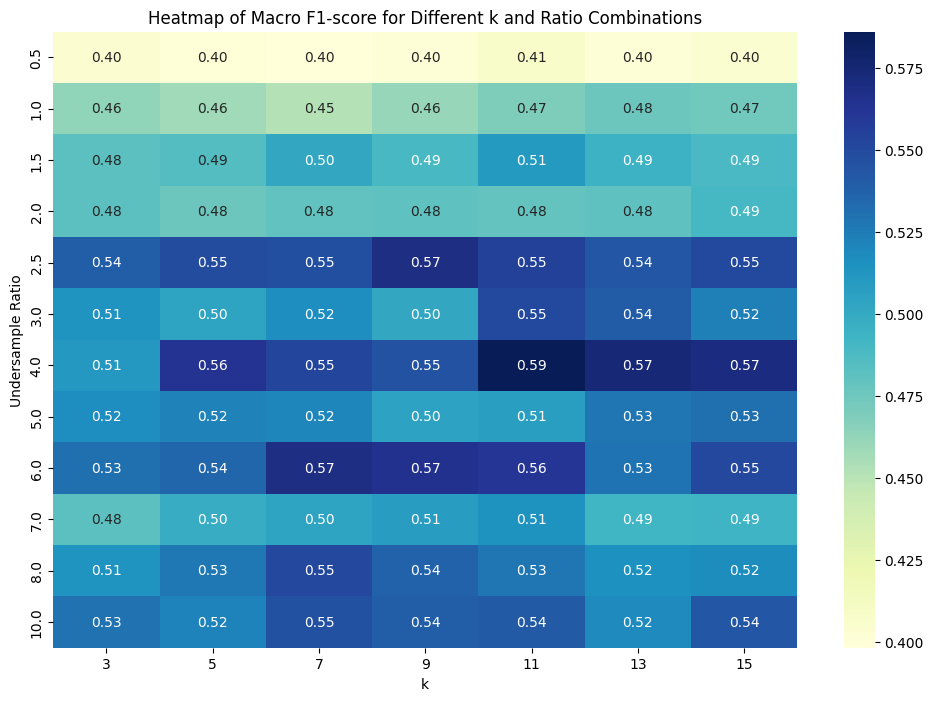

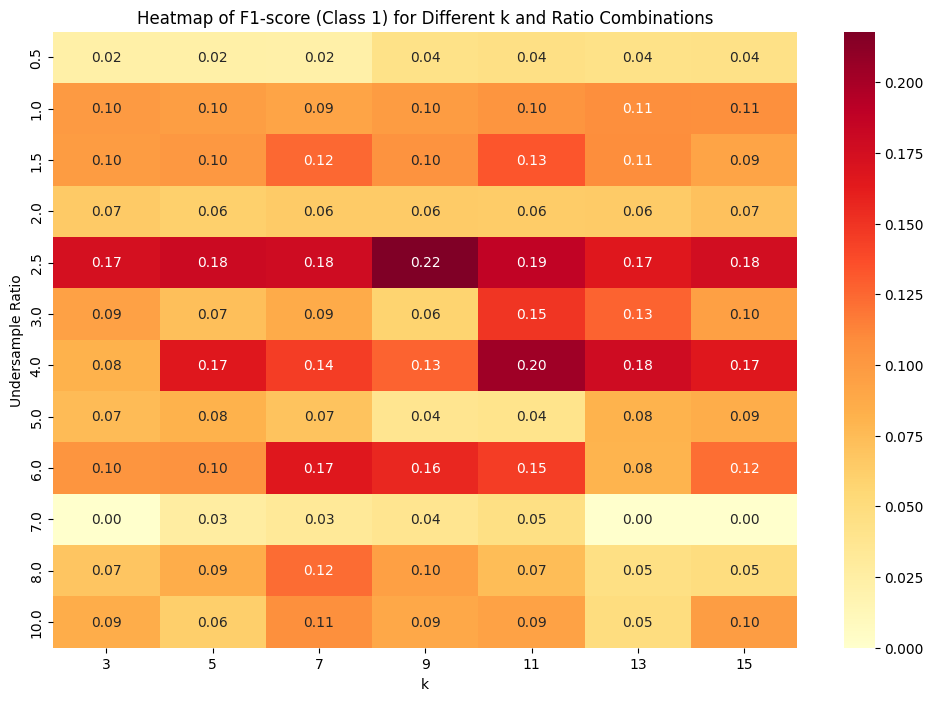

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
from tqdm import tqdm 

# Define the parameter grid
ratios = sorted(train_datasets.keys())  # Use keys from train_datasets as the list of ratios
k_values = range(3, 16, 2)  # k values to test (3, 5, ..., 15)

# DataFrame to store results for each (k, ratio) combination
results = []

# Single test dataset
# X_test_values = X_test.values
X_test_values = X_test.values
y_test_values = y_test.values

# Grid search over both k and ratio
for ratio in tqdm(ratios, desc="Testing different ratios"):
    # Extract the train set for the current ratio
    X_train_ratio, y_train_ratio = train_datasets[ratio]
    sample_size = int(len(X_train_ratio) / 4)
    indices = np.random.choice(range(len(X_test_values)), size=sample_size, replace=False)
    X_test_sampled = X_test_values[indices]
    y_test_sampled = y_test_values[indices]

    for k in k_values:
        # Run KNN with the given k and ratio
        y_pred = knn_predict(X_train_ratio.values, y_train_ratio.values, X_test_sampled, k=k)

        # Generate classification report
        report = classification_report(y_test_sampled, y_pred, output_dict=True)

        # Store the metrics for this (k, ratio) combination
        results.append({
            'k': k,
            'ratio': ratio,
            'f1_class_1': report['1']['f1-score'],
            'macro_f1': report['macro avg']['f1-score'],
            'weighted_f1': report['weighted avg']['f1-score']
        })

# Convert results to a DataFrame for easy manipulation
results_df = pd.DataFrame(results)

# Sort by macro_f1 and f1_class_1 to find the top models
top_5_macro_f1 = results_df.sort_values(by='macro_f1', ascending=False).head(5)
top_5_f1_class_1 = results_df.sort_values(by='f1_class_1', ascending=False).head(5)

print("Top 5 Models by Macro F1-score:")
print(top_5_macro_f1)

print("\nTop 5 Models by F1-score for Class 1:")
print(top_5_f1_class_1)

# Pivot the DataFrame for heatmap visualization
pivot_macro_f1 = results_df.pivot(index="ratio", columns="k", values="macro_f1")
pivot_f1_class_1 = results_df.pivot(index="ratio", columns="k", values="f1_class_1")

# Plot heatmap for Macro F1-score
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_macro_f1, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap of Macro F1-score for Different k and Ratio Combinations")
plt.xlabel("k")
plt.ylabel("Undersample Ratio")
plt.show()

# Plot heatmap for F1-score (Class 1)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_f1_class_1, annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("Heatmap of F1-score (Class 1) for Different k and Ratio Combinations")
plt.xlabel("k")
plt.ylabel("Undersample Ratio")
plt.show()


# Cosine grid search

Testing different ratios: 100%|██████████| 12/12 [00:07<00:00,  1.52it/s]


Top 5 Models by Macro F1-score:
     k  ratio  f1_class_1  macro_f1  weighted_f1
67  11    7.0    0.188679  0.585568     0.967240
69  15    7.0    0.170213  0.577170     0.968525
66   9    7.0    0.158730  0.568509     0.962577
65   7    7.0    0.131148  0.554726     0.962066
68  13    7.0    0.122449  0.552467     0.965998

Top 5 Models by F1-score for Class 1:
     k  ratio  f1_class_1  macro_f1  weighted_f1
67  11    7.0    0.188679  0.585568     0.967240
69  15    7.0    0.170213  0.577170     0.968525
66   9    7.0    0.158730  0.568509     0.962577
34  15    2.5    0.150538  0.535808     0.904175
29   5    2.5    0.138614  0.525500     0.895412


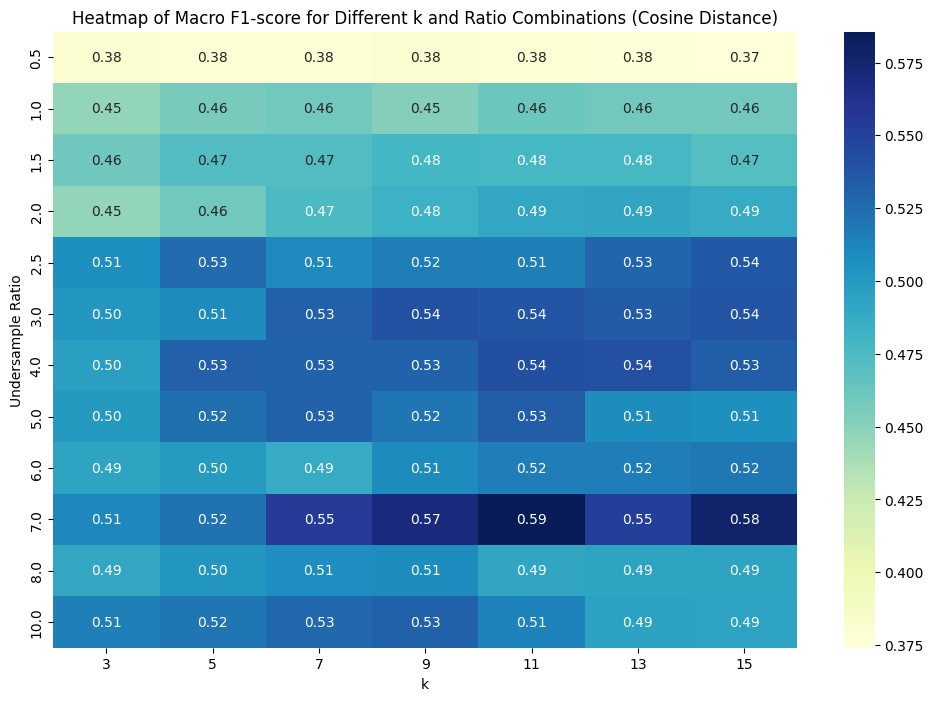

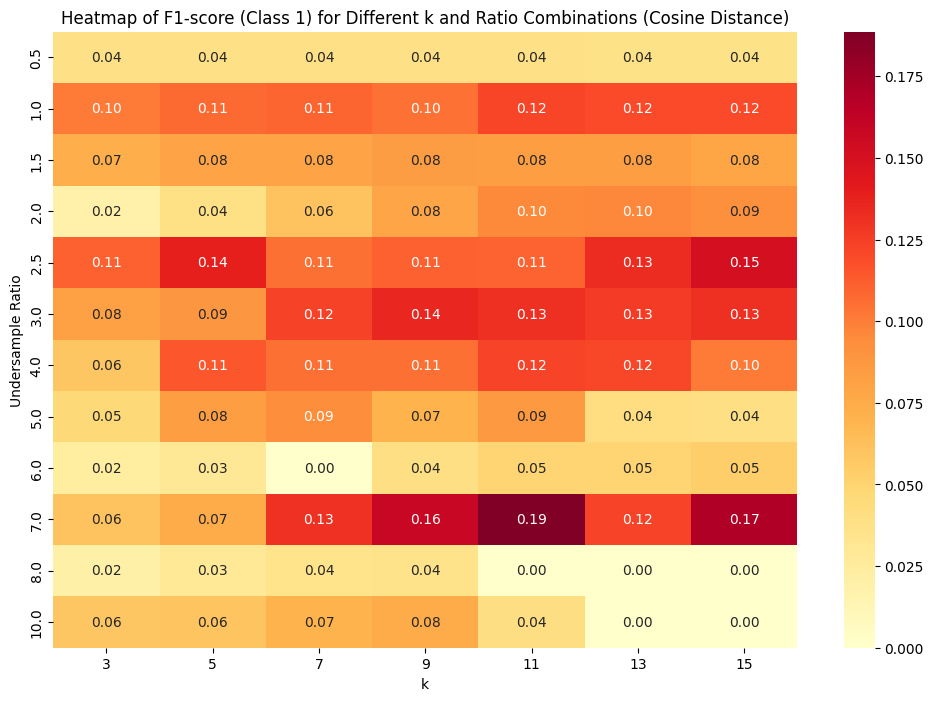

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from tqdm import tqdm  # Import tqdm for progress bar

# Define the parameter grid
ratios = sorted(train_datasets.keys())  # Use keys from train_datasets as the list of ratios
k_values = range(3, 16, 2)  # k values to test (3, 5, ..., 15)

# DataFrame to store results for each (k, ratio) combination
results = []

# Single test dataset
X_test_df = X_test  # Use X_test directly as a DataFrame to retain feature names
y_test_values = y_test.values

# Grid search over both k and ratio
for ratio in tqdm(ratios, desc="Testing different ratios"):
    # Extract the train set for the current ratio
    X_train_ratio, y_train_ratio = train_datasets[ratio]
    sample_size = int(len(X_train_ratio) / 4)
    indices = np.random.choice(range(len(X_test)), size=sample_size, replace=False)
    X_test_sampled = X_test.iloc[indices]#df
    y_test_sampled = y_test_values[indices]# np array

    for k in k_values:
        # Initialize KNeighborsClassifier with cosine distance
        knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')

        # Fit the model on the training set
        knn.fit(X_train_ratio, y_train_ratio)

        # Predict on the test set using DataFrame to maintain feature names
        y_pred = knn.predict(X_test_sampled)

        # Generate classification report
        report = classification_report(y_test_sampled, y_pred, output_dict=True)

        # Store the metrics for this (k, ratio) combination
        results.append({
            'k': k,
            'ratio': ratio,
            'f1_class_1': report['1']['f1-score'],
            'macro_f1': report['macro avg']['f1-score'],
            'weighted_f1': report['weighted avg']['f1-score']
        })

# Convert results to a DataFrame for easy manipulation
results_df = pd.DataFrame(results)

# Sort by macro_f1 and f1_class_1 to find the top models
top_5_macro_f1 = results_df.sort_values(by='macro_f1', ascending=False).head(5)
top_5_f1_class_1 = results_df.sort_values(by='f1_class_1', ascending=False).head(5)

print("Top 5 Models by Macro F1-score:")
print(top_5_macro_f1)

print("\nTop 5 Models by F1-score for Class 1:")
print(top_5_f1_class_1)

# Pivot the DataFrame for heatmap visualization
pivot_macro_f1 = results_df.pivot(index="ratio", columns="k", values="macro_f1")
pivot_f1_class_1 = results_df.pivot(index="ratio", columns="k", values="f1_class_1")

# Plot heatmap for Macro F1-score
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_macro_f1, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap of Macro F1-score for Different k and Ratio Combinations (Cosine Distance)")
plt.xlabel("k")
plt.ylabel("Undersample Ratio")
plt.show()

# Plot heatmap for F1-score (Class 1)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_f1_class_1, annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("Heatmap of F1-score (Class 1) for Different k and Ratio Combinations (Cosine Distance)")
plt.xlabel("k")
plt.ylabel("Undersample Ratio")
plt.show()


# mahalobnis grid search

Testing different ratios:   0%|          | 0/12 [00:00<?, ?it/s]

Testing different ratios: 100%|██████████| 12/12 [01:00<00:00,  5.06s/it]


Top 5 Models by Macro F1-score:
     k  ratio  f1_class_1  macro_f1  weighted_f1
73   9    8.0    0.163934  0.572711     0.966391
58   7    6.0    0.153846  0.561298     0.949401
66   9    7.0    0.131148  0.554726     0.958006
74  11    8.0    0.115385  0.549371     0.967330
71   5    8.0    0.117647  0.545092     0.956751

Top 5 Models by F1-score for Class 1:
     k  ratio  f1_class_1  macro_f1  weighted_f1
73   9    8.0    0.163934  0.572711     0.966391
58   7    6.0    0.153846  0.561298     0.949401
66   9    7.0    0.131148  0.554726     0.958006
13  15    1.0    0.126316  0.485003     0.829940
11  11    1.0    0.126316  0.485003     0.829940


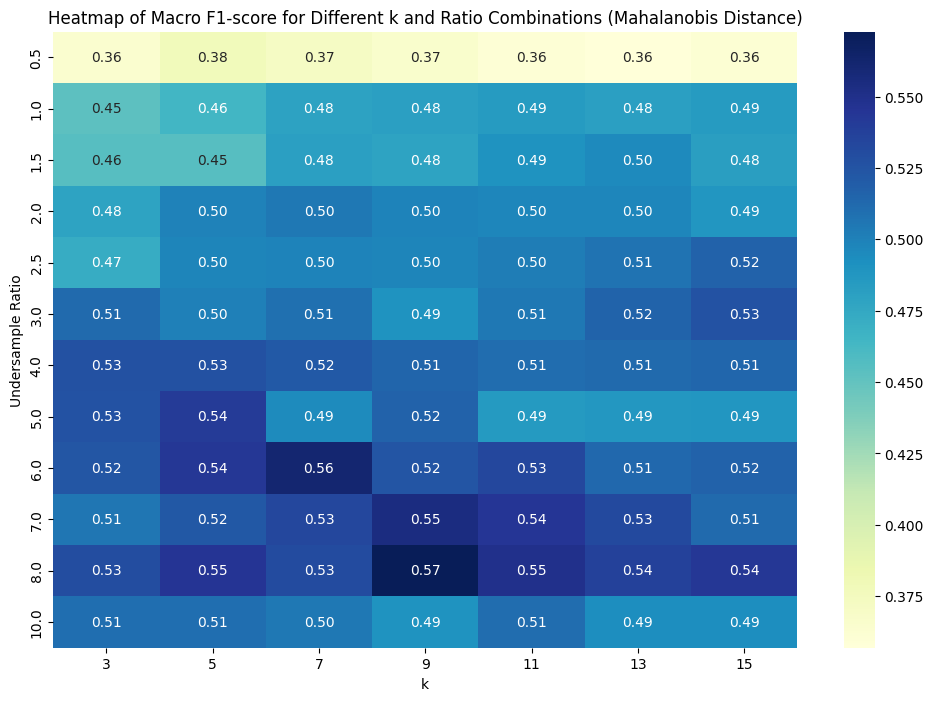

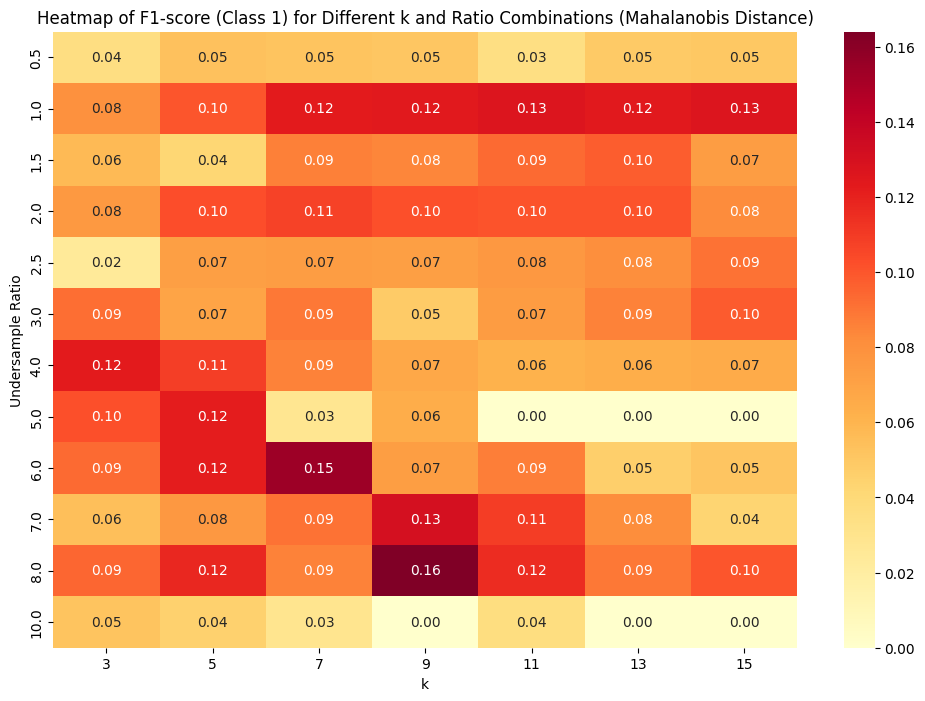

In [47]:
from numpy.linalg import inv

# Define the parameter grid
ratios = sorted(train_datasets.keys())  # Use keys from train_datasets as the list of ratios
k_values = range(3, 16, 2)  # k values to test (3, 5, ..., 15)

# DataFrame to store results for each (k, ratio) combination
results = []

# Single test dataset
X_test_values = X_test
y_test_values = y_test.values

# Grid search over both k and ratio
for ratio in tqdm(ratios, desc="Testing different ratios"):
    # Extract the training set for the current ratio
    X_train_ratio, y_train_ratio = train_datasets[ratio]
    sample_size = int(len(X_train_ratio) / 4)
    indices = np.random.choice(range(len(X_test)), size=sample_size, replace=False)
    X_test_sampled = X_test.iloc[indices]#df
    y_test_sampled = y_test_values[indices]# np array

    # Calculate inverse covariance matrix for Mahalanobis distance
    cov_matrix = np.cov(X_train_ratio, rowvar=False)
    inv_cov_matrix = inv(cov_matrix)

    for k in k_values:
        # Initialize KNeighborsClassifier with Mahalanobis distance
        knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': inv_cov_matrix})

        # Fit the model on the training set
        knn.fit(X_train_ratio, y_train_ratio)

        # Predict on the single test set
        y_pred = knn.predict(X_test_sampled)

        # Generate classification report
        report = classification_report(y_test_sampled, y_pred, output_dict=True)

        # Store the metrics for this (k, ratio) combination
        results.append({
            'k': k,
            'ratio': ratio,
            'f1_class_1': report['1']['f1-score'],
            'macro_f1': report['macro avg']['f1-score'],
            'weighted_f1': report['weighted avg']['f1-score']
        })

# Convert results to a DataFrame for easy manipulation
results_df = pd.DataFrame(results)

# Sort separately by macro_f1 and f1_class_1 and get top 5 for each
top_5_macro_f1 = results_df.sort_values(by='macro_f1', ascending=False).head(5)
top_5_f1_class_1 = results_df.sort_values(by='f1_class_1', ascending=False).head(5)

print("Top 5 Models by Macro F1-score:")
print(top_5_macro_f1)

print("\nTop 5 Models by F1-score for Class 1:")
print(top_5_f1_class_1)

# Pivot the DataFrame for heatmap visualization
pivot_macro_f1 = results_df.pivot(index="ratio", columns="k", values="macro_f1")
pivot_f1_class_1 = results_df.pivot(index="ratio", columns="k", values="f1_class_1")

# Plot heatmap for Macro F1-score
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_macro_f1, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap of Macro F1-score for Different k and Ratio Combinations (Mahalanobis Distance)")
plt.xlabel("k")
plt.ylabel("Undersample Ratio")
plt.show()

# Plot heatmap for F1-score (Class 1)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_f1_class_1, annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("Heatmap of F1-score (Class 1) for Different k and Ratio Combinations (Mahalanobis Distance)")
plt.xlabel("k")
plt.ylabel("Undersample Ratio")
plt.show()
